In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load and explore the dataset
file_path = '/content/song_data.csv'
df = pd.read_csv(file_path)
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


# DATA PREPROCESSING

In [ ]:
# Drop unnecessary features
df=df.drop('song_name',axis=1)

In [ ]:
df=df.drop_duplicates()
print(df.shape)

(14924, 14)


In [ ]:
df.isnull().sum()

,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
audio_mode,0


In [ ]:
df.nunique().sort_values()

,0
audio_mode,2
time_signature,5
key,12
song_popularity,101
danceability,849
energy,1132
speechiness,1224
audio_valence,1246
liveness,1425
acousticness,3209


In [ ]:
# Feature categorization
categorical_features = ['audio_mode', 'time_signature', 'key']
numerical_features = [
    'song_duration_ms', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence'
]

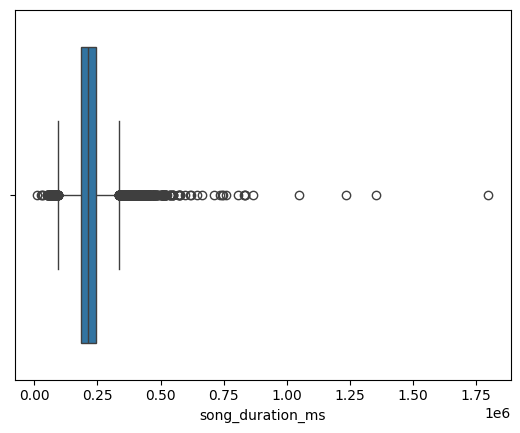

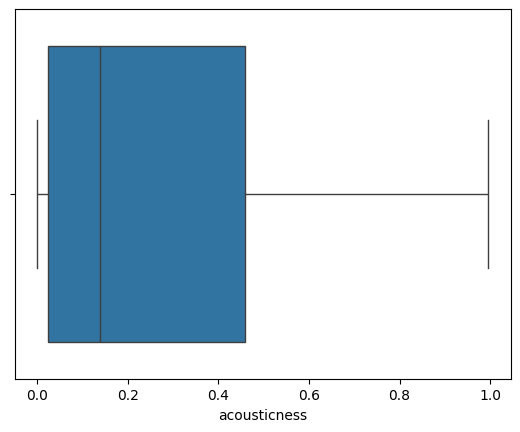

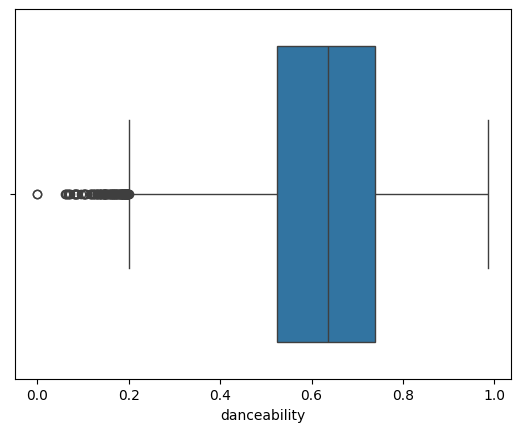

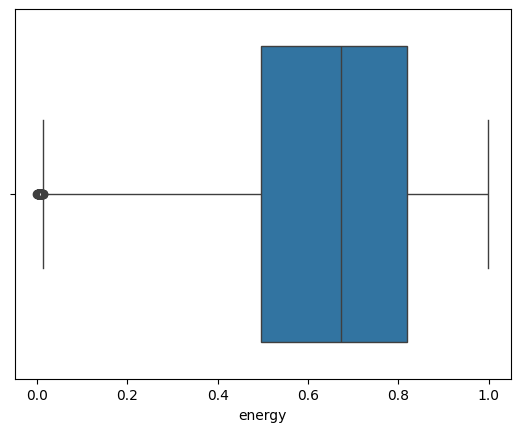

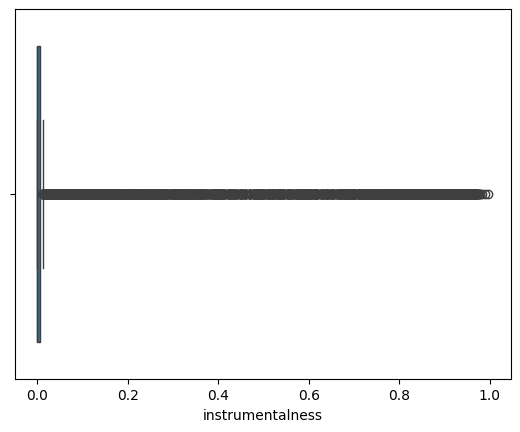

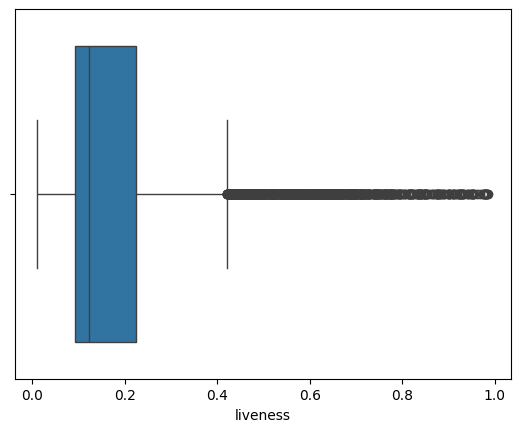

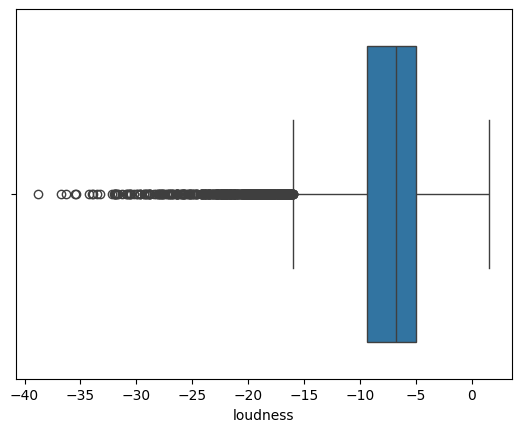

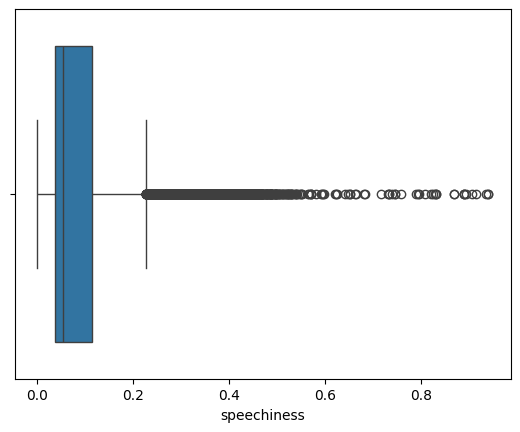

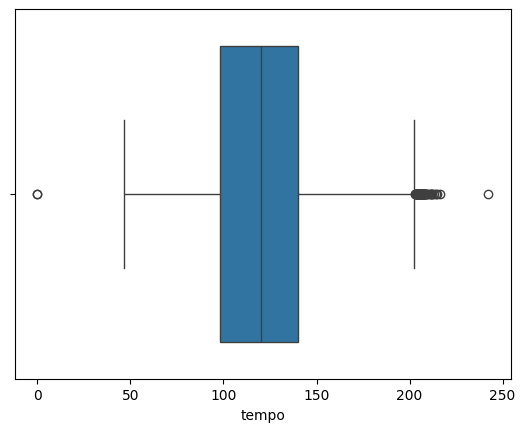

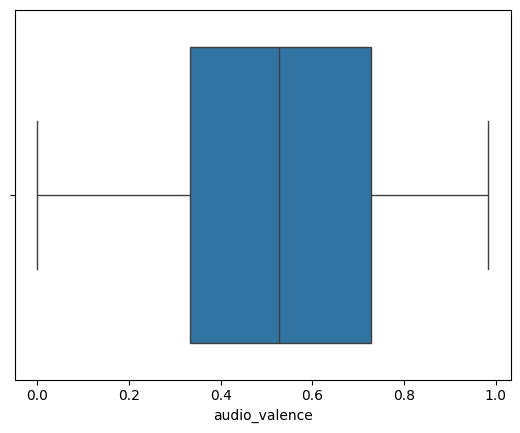

In [ ]:
for i in numerical_features:
  sns.boxplot(x=df[i])
  plt.show()

In [ ]:
feat_with_outliers = ['song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo']
for i in feat_with_outliers:
  Q1 = df[i].quantile(0.05)
  Q3 = df[i].quantile(0.90)
  df[i] = np.where(df[i] < Q1, Q1,
                               np.where(df[i] > Q3, Q3, df[i]))
display(df.shape)

(14924, 14)

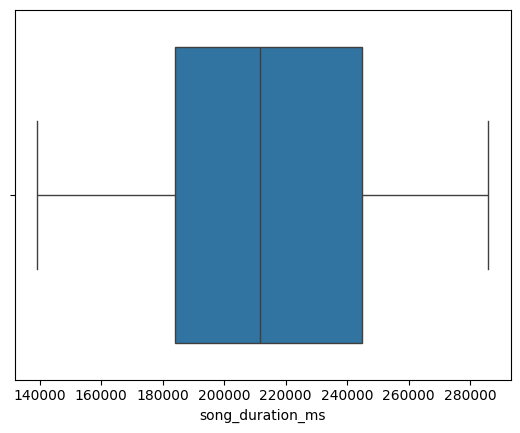

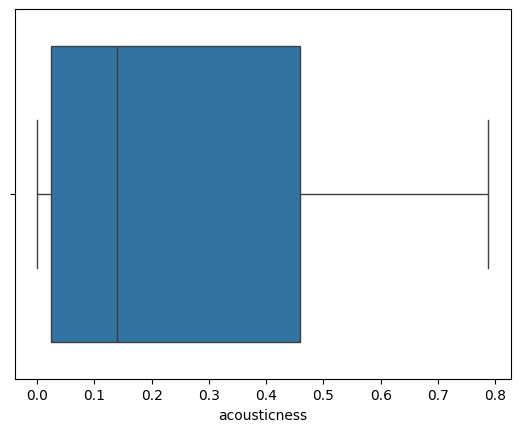

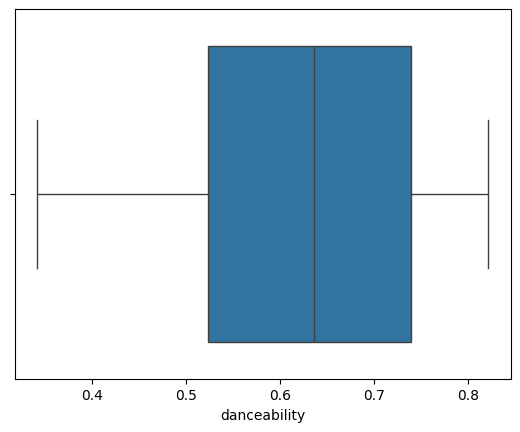

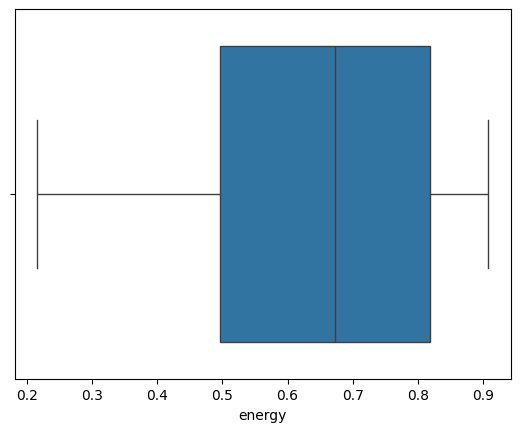

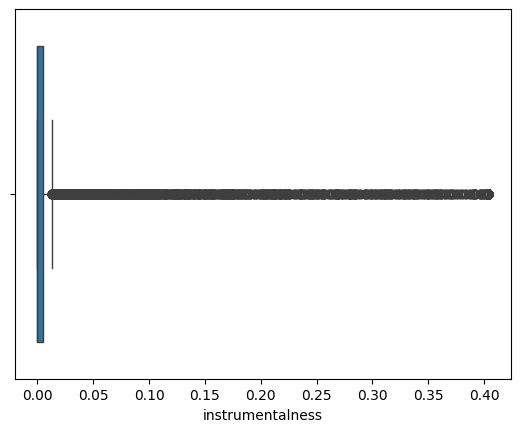

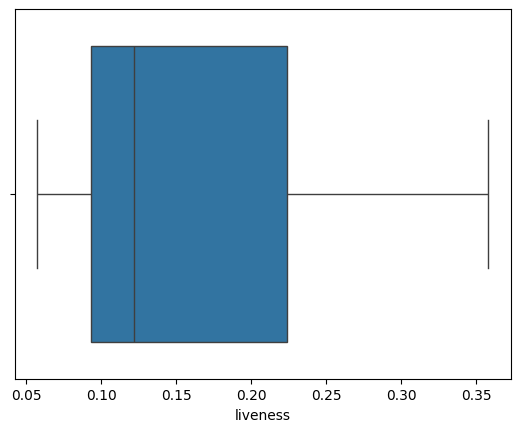

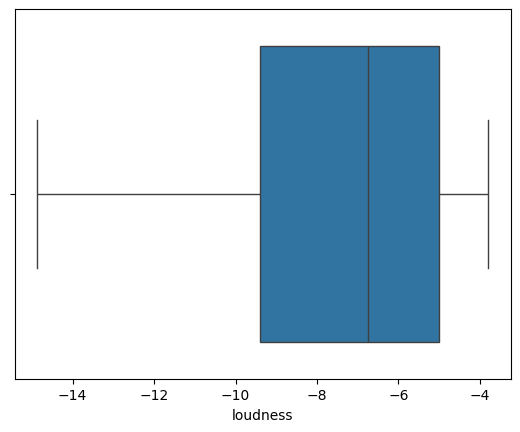

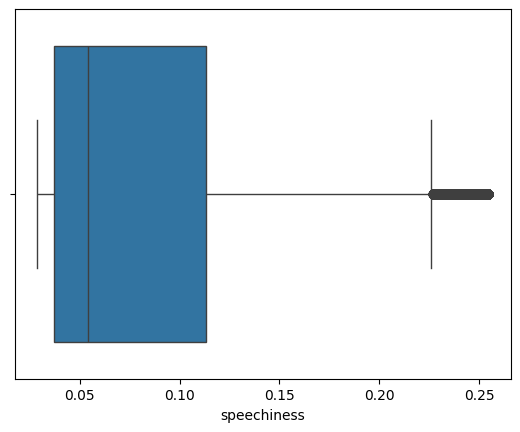

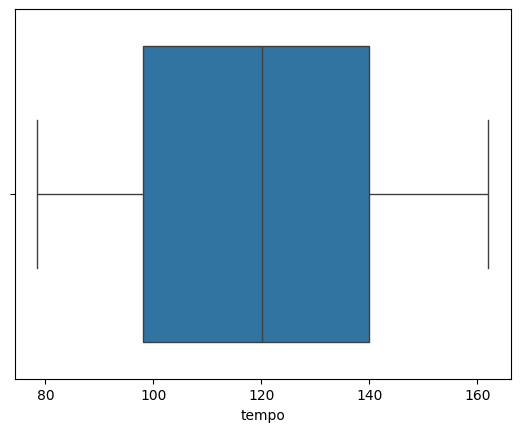

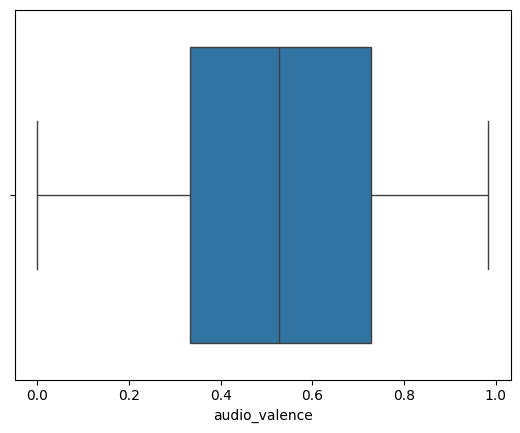

In [ ]:
for i in numerical_features:
  sns.boxplot(x=df[i])
  plt.show()

In [ ]:
# Categorize 'song_popularity'
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = list(range(1, 11))
df['song_popularity'] = pd.cut(df['song_popularity'], bins=bins, labels=labels, include_lowest=True).astype(int)

In [ ]:
#split features and target
X = df.drop(columns=["song_popularity"])
y = df["song_popularity"]

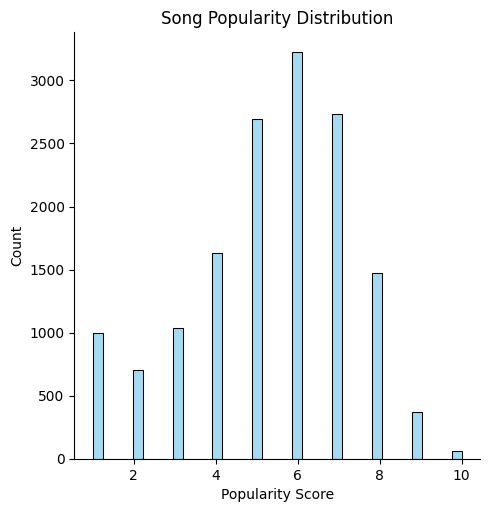

In [ ]:
# Plot the distribution of song popularity
sns.displot(y, color='skyblue', kde=False)

# Show the plot
plt.title("Song Popularity Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

In [ ]:
X_os, y_os = RandomOverSampler(random_state=3).fit_resample(X, y)

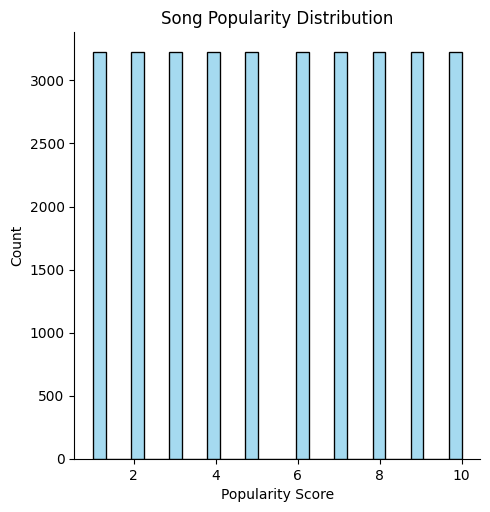

In [ ]:
# Plot the distribution of song popularity
sns.displot(y_os, color='skyblue', kde=False)

# Show the plot
plt.title("Song Popularity Distribution")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

# FEATURE SELECTION

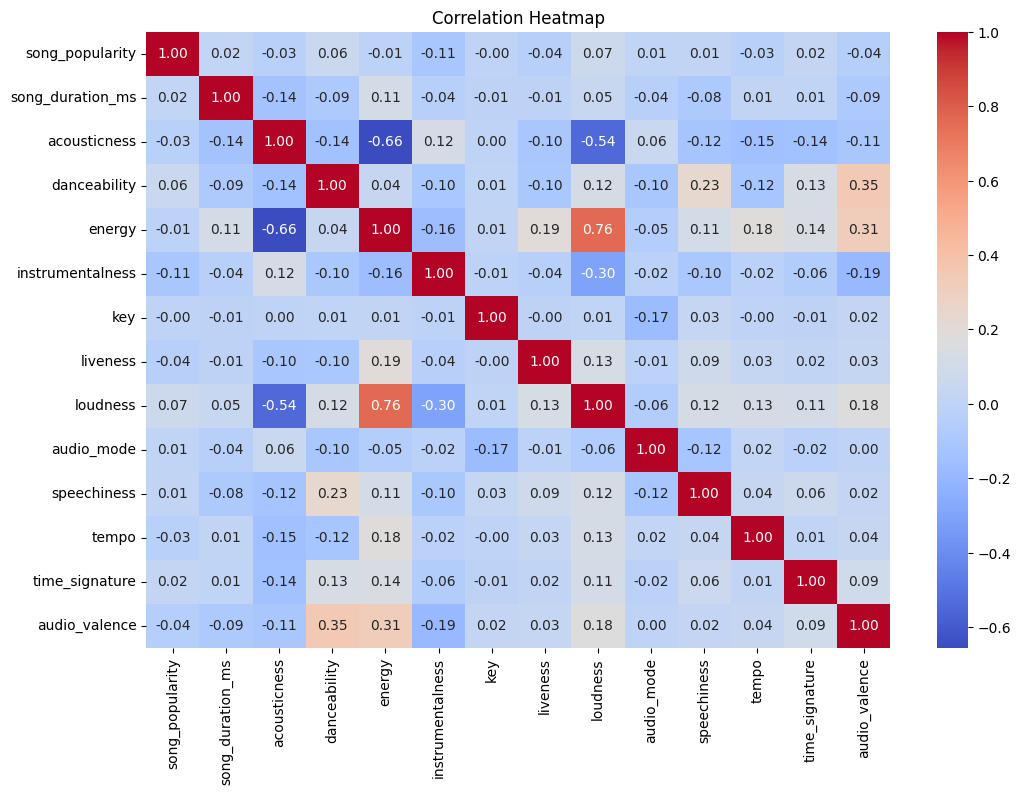

In [ ]:
# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.corr()['song_popularity'].sort_values()

,song_popularity
instrumentalness,-0.105681
audio_valence,-0.044461
liveness,-0.041294
acousticness,-0.034532
tempo,-0.029293
energy,-0.009780
key,-0.001054
audio_mode,0.008214
speechiness,0.011599
song_duration_ms,0.018072


In [ ]:
# Feature selection based on correlation
X = X_os.drop(columns=['instrumentalness','speechiness','audio_mode','key','time_signature','energy'])

In [ ]:
X.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'liveness',
       'loudness', 'tempo', 'audio_valence'],
      dtype='object')

#model creation and evaluation

In [ ]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('model', MinMaxScaler()),# Scale features
    ('classifier', RandomForestClassifier(max_depth=20, n_estimators=200, random_state=3))  # Random Forest Classifier
])

In [ ]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y_os,test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25776, 7), (6444, 7), (25776,), (6444,))

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=3))])

In [ ]:
y_pred=pipeline.predict(X_test)
ac=accuracy_score(y_test, y_pred)
ac

0.7318435754189944

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85       618
           2       0.88      0.97      0.93       647
           3       0.85      0.91      0.88       669
           4       0.70      0.77      0.73       641
           5       0.46      0.41      0.43       629
           6       0.34      0.21      0.26       692
           7       0.44      0.37      0.40       646
           8       0.71      0.81      0.76       644
           9       0.91      0.99      0.95       619
          10       0.98      1.00      0.99       639

    accuracy                           0.73      6444
   macro avg       0.71      0.74      0.72      6444
weighted avg       0.70      0.73      0.71      6444



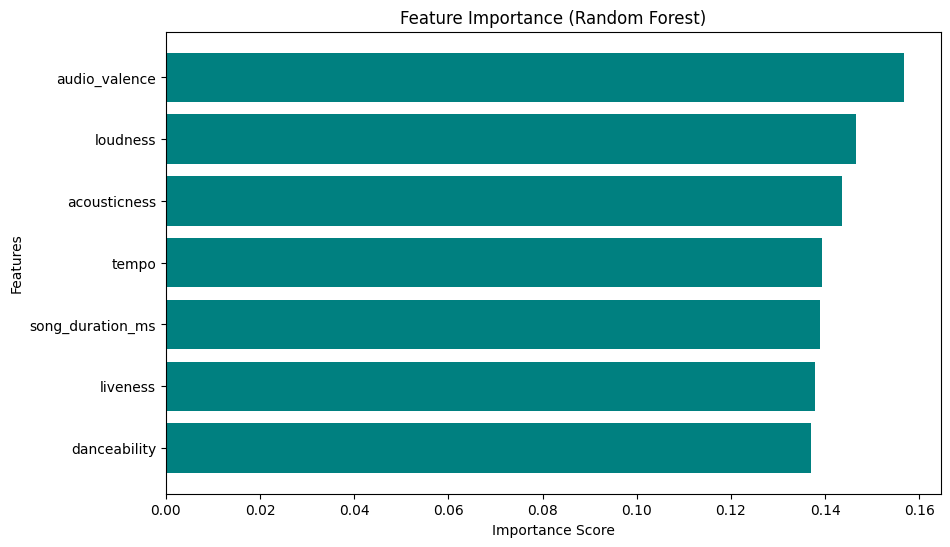

In [ ]:
# Feature importance visualization
feature_importances = pipeline.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importances)

# Ensure sorted_idx is within the range of X.columns
sorted_idx = sorted_idx[sorted_idx < X.shape[1]]  # Filter indices

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="teal")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

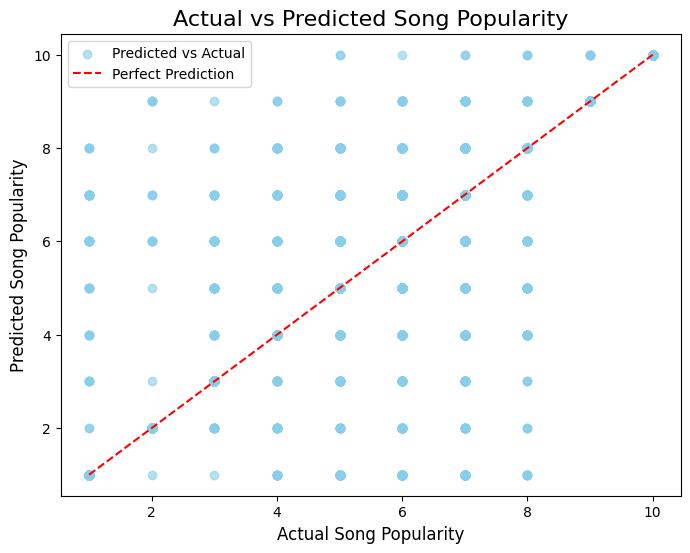

In [ ]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6, label="Predicted vs Actual")
# Add a diagonal line for perfect prediction comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Song Popularity", fontsize=16)
plt.xlabel("Actual Song Popularity", fontsize=12)
plt.ylabel("Predicted Song Popularity", fontsize=12)
plt.legend()
plt.show()

In [ ]:
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_test, y_test))

0.9917752948479206
0.7318435754189944


In [ ]:
import pickle
pickle_file = "pipeline.sav"

# Save the model to a file
with open(pickle_file, "wb") as file:
    pickle.dump(pipeline, file)

print(f"Model saved as {pickle_file}")

Model saved as pipeline.sav


In [ ]:
# X.head()

In [ ]:
# y.head()